In [1]:
# Import des bibliothèques nécessaires

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler


# import logging  # À voir si on l'ajoute pour mieux structurer les messages dans la console

In [2]:
# Chargement du fichier dataset

dataset = "data/Teacher/NSL_KDD.csv"

In [3]:
# Question 4 - Renommer les colonnes du dataset

## Liste des nouveaux noms de colonnes

col_names = ["duration","protocol_type","service","flag","src_bytes",
"dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
"logged_in","num_compromised","root_shell","su_attempted","num_root",
"num_file_creations","num_shells","num_access_files","num_outbound_cmds",
"is_host_login","is_guest_login","count","srv_count","serror_rate",
"srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
"diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
"dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

## Modification des noms de colonnes
dataset = pd.read_csv(dataset, header=None, names=col_names)

## Affichage du dataset d'entraînement avec les nouveaux noms de colonnes
print("Dataset avec les nouveaux noms de colonnes :")
display(dataset)

Dataset avec les nouveaux noms de colonnes :


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


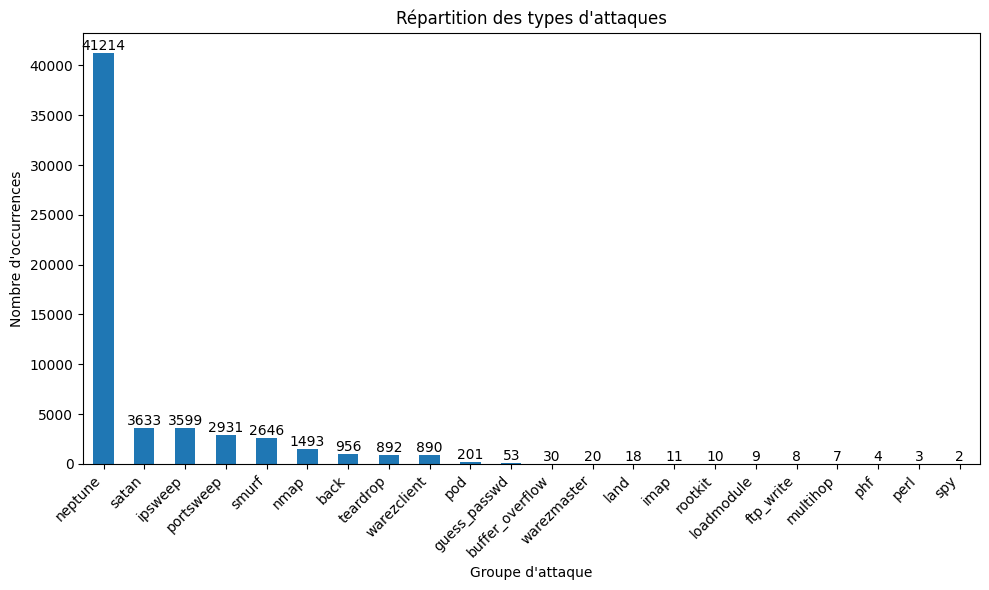

In [4]:
# Question 2 - Visualiser les valeurs de la colonne 'label' et tracer leur répartition

colonne_label = dataset['label'] # Sélection de la colonne 'label' du DataFrame

## Suppression des valeurs 'normal'
colonne_label = colonne_label[colonne_label != "normal"]

ax = colonne_label.value_counts().plot(
    kind='bar',
    title='Répartition des types d\'attaques',
    figsize=(10, 6),
)

ax.set_xlabel('Groupe d\'attaque')
ax.set_ylabel("Nombre d'occurrences")
plt.xticks(rotation=45, ha='right')

## Ajouter les valeurs au-dessus des barres
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,   # position horizontale (au centre de la barre)
        p.get_height() + 0.5,            # position verticale (légèrement au-dessus)
        int(p.get_height()),             # valeur affichée
        ha='center',                     # centrer horizontalement
        va='bottom'                      # aligner en bas
    )

plt.tight_layout()
plt.show()

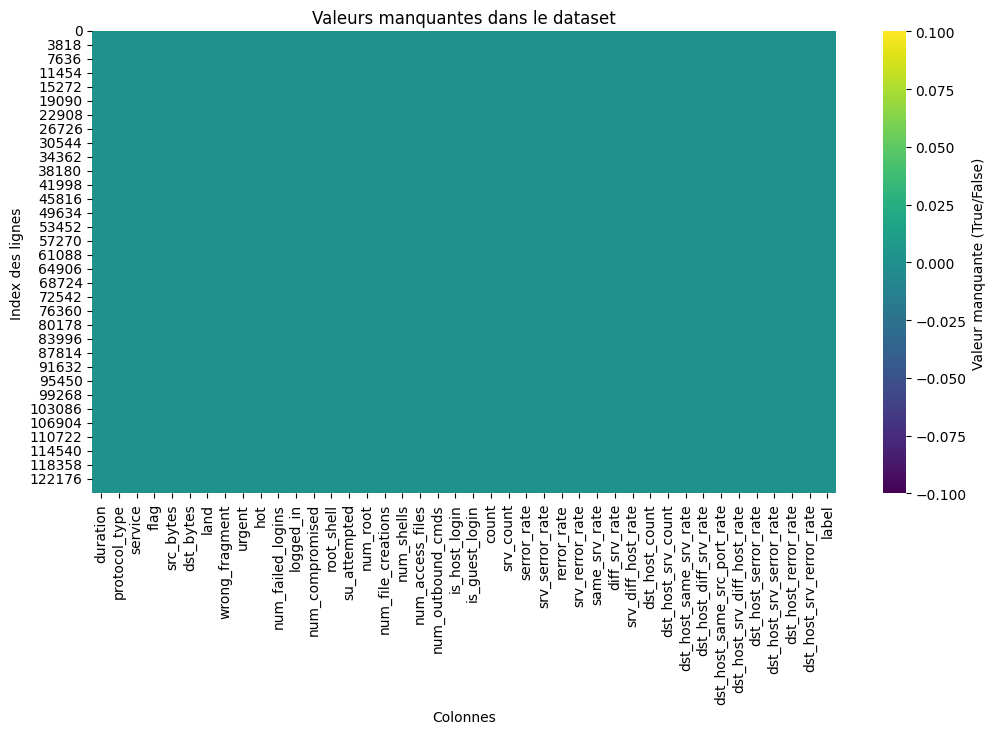

In [5]:
# Question 3 - Analyse des valeurs manquantes avec une heatmap

# Calcul des valeurs manquantes dans le dataset d'entraînement
missing_train = dataset.isnull().sum()

# Créer et afficher une carte de chaleur pour visualiser les valeurs manquantes
plt.figure(figsize=(12, 6))
sns.heatmap(
    dataset.isnull(),
    cbar=True,
    cmap='viridis',
    cbar_kws={'label': 'Valeur manquante (True/False)'}
)
plt.title("Valeurs manquantes dans le dataset")
plt.xlabel('Colonnes')
plt.ylabel('Index des lignes')
plt.show()


In [6]:
# Question 5 - Vérifier le nombre de lignes dupliquées dans le dataset d'entraînement

print("Nombre total de lignes dupliquées dans le dataset d'entraînement :", dataset.duplicated().sum())

Nombre total de lignes dupliquées dans le dataset d'entraînement : 0


In [7]:
# Question 6 - Suppression des doublons

print("Avant suppression, nombre de lignes dans le dataset d'entraînement :", len(dataset))
dataset.drop_duplicates(inplace=True) # Supprimer les doublons
print("Après suppression, nombre de lignes dans le dataset d'entraînement :", len(dataset))

Avant suppression, nombre de lignes dans le dataset d'entraînement : 125973
Après suppression, nombre de lignes dans le dataset d'entraînement : 125973


In [8]:
# Question 10 - Reprendre le dataset d'origine (avant autres traitements) pour la question 10

train_data_q10 = dataset.copy() # Faire une copie pour ne pas modifier l'original

In [9]:
# Question 7 - Encodage des variables catégorielles

## Identifier les colonnes catégorielles
cat_columns = dataset.select_dtypes(include=['object']).columns.tolist()
print("Colonnes catégorielles trouvées :", cat_columns)

## Afficher les colonnes des valeurs catégorielles
for col in cat_columns:
    print(f"\nColonne : {col}")
    print(dataset[col].value_counts())  # Affiche les valeurs uniques avec leur nombre


Colonnes catégorielles trouvées : ['protocol_type', 'service', 'flag', 'label']

Colonne : protocol_type
protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64

Colonne : service
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64

Colonne : flag
flag
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64

Colonne : label
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd   

In [10]:
# Question 7 (suite) - Encodage des variables catégorielles


## Encoder chaque colonne catégorielle avec LabelEncoder car plus simple et n'ajoute pas de colonnes supplémentaires
for col in cat_columns:
    dataset[col] = LabelEncoder().fit_transform(dataset[col])

display(dataset)


# ## Encoder chaque colonne catégorielle avec OneHotEncoder car variables nominales (sans ordre, ex. couleur, pays, type de produit), mais plus compliquer a mettre en place et ajout d’énormément de variable donc risque de sur apprentissage et ça peut rendre le model plus lent
# enc = OneHotEncoder(sparse_output=False, dtype='int')  # dtype='int' pour avoir des entiers au lieu de float

# # Traiter chaque colonne catégorielle une par une avec une boucle
# for col in cat_columns:
#     print(f"Traitement de la colonne : {col}")
    
#     # Extraire les valeurs uniques de la colonne
#     valeurs_uniques = dataset[col].unique()
#     print(f"Valeurs uniques dans {col}: {valeurs_uniques}")
    
#     # Préparer les données pour OneHotEncoder (reshape en 2D)
#     X = dataset[col].values.reshape(-1, 1)
    
#     # Encoder la colonne
#     encoded_data = enc.fit_transform(X)
    
#     # Créer les noms des nouvelles colonnes
#     feature_names = enc.get_feature_names_out([col])
    
#     # Créer un DataFrame avec les données encodées
#     encoded_df = pd.DataFrame(encoded_data, columns=feature_names, index=dataset.index)
    
#     # Ajouter les nouvelles colonnes au dataset
#     dataset = pd.concat([dataset, encoded_df], axis=1)
    
#     # Supprimer l'ancienne colonne du dataset
#     dataset = dataset.drop(columns=[col])
    
#     print(f"Colonnes ajoutées: {list(feature_names)}")
#     print(f"Colonne {col} supprimée\n")

# print(f"Nombre de colonnes avant encodage : {len(dataset.columns)}")
# print(f"Nombre de colonnes après encodage : {len(dataset.columns)}")

# display(dataset)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,11
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,11
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,11
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,49,5,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,9
125969,8,2,49,9,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,11
125970,0,1,54,9,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,11
125971,0,1,30,5,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9


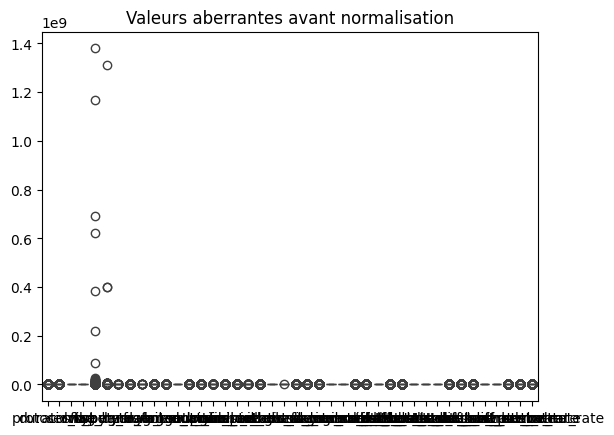

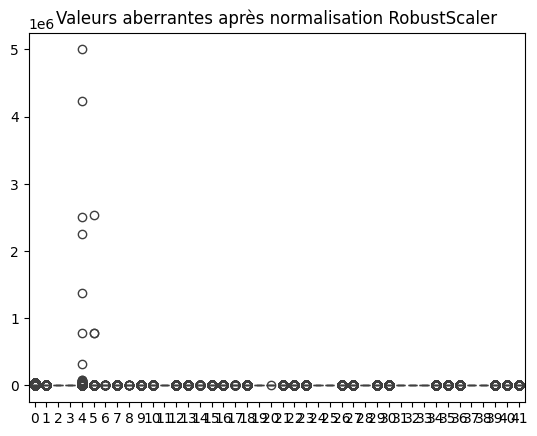

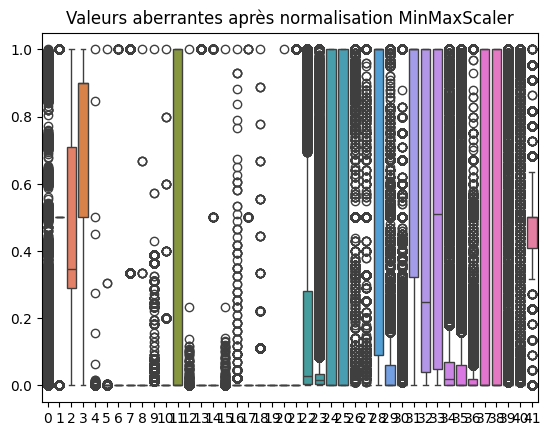

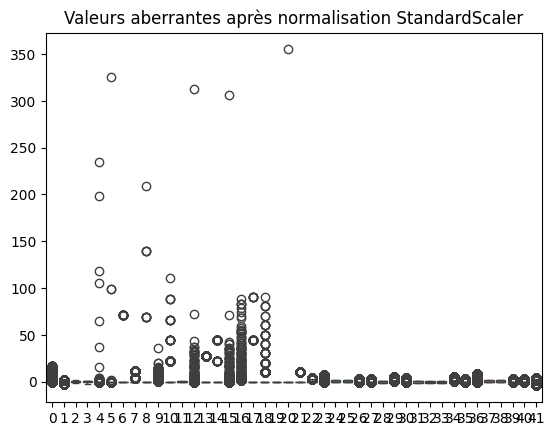

In [11]:

# Question 8 - Normalisation / Mise à l'échelle

## Copy du dataset pour éviter de modifier l'original
dataset_StandardScaler = dataset.copy()
dataset_MinMaxScaler = dataset.copy()
dataset_RobustScaler = dataset.copy()

## Afficher les valeurs aberrantes avant normalisation
sns.boxplot(data=dataset)
plt.title("Valeurs aberrantes avant normalisation")
plt.show()


## Appliquer RobustScaler
dataset_RobustScaler = RobustScaler().fit_transform(dataset_RobustScaler)

sns.boxplot(data=dataset_RobustScaler)
plt.title("Valeurs aberrantes après normalisation RobustScaler")
plt.show()

## Appliquer MinMaxScaler
dataset_MinMaxScaler = MinMaxScaler().fit_transform(dataset_MinMaxScaler)

sns.boxplot(data=dataset_MinMaxScaler)
plt.title("Valeurs aberrantes après normalisation MinMaxScaler")
plt.show()

## Appliquer StandardScaler
dataset_StandardScaler = StandardScaler().fit_transform(dataset_StandardScaler)
sns.boxplot(data=dataset_StandardScaler)
plt.title("Valeurs aberrantes après normalisation StandardScaler")
plt.show()

In [12]:
# Question 8 (suite) - Normalisation / Mise à l'échelle

## Utilisation de la fonction StandardScaler
dataset = StandardScaler().fit_transform(dataset)

# Reconvertir l'array NumPy en DataFrame pandas (nécessaire après StandardScaler)
dataset = pd.DataFrame(dataset)

## Liste des nouveaux noms de colonnes

col_names = ["duration","protocol_type","service","flag","src_bytes",
"dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
"logged_in","num_compromised","root_shell","su_attempted","num_root",
"num_file_creations","num_shells","num_access_files","num_outbound_cmds",
"is_host_login","is_guest_login","count","srv_count","serror_rate",
"srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
"diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
"dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

## Réassigner les noms de colonnes au DataFrame
dataset.columns = col_names

display(dataset)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110249,-0.124706,-0.686785,0.751111,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,0.142074
1,-0.110249,2.219312,0.781428,0.751111,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.142074
2,-0.110249,-0.124706,1.087305,-0.736235,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,-0.616630
3,-0.110249,-0.124706,-0.442083,0.751111,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,0.142074
4,-0.110249,-0.124706,-0.442083,0.751111,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.142074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.124706,1.087305,-0.736235,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,-0.616630
125969,-0.107178,2.219312,1.087305,0.751111,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,1.159389,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.142074
125970,-0.110249,-0.124706,1.393183,0.751111,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.773724,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,0.142074
125971,-0.110249,-0.124706,-0.075030,-0.736235,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.972455,-1.094207,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,-0.616630


In [13]:
# Question 9 - Découpage en ensembles (train / test)

dataset = dataset.sample(frac=1, random_state=42)  # Mélanger les données (utile si les données avaient un ordre particulier pour éviter des biais)

dataset_size = len(dataset)  # Taille totale du dataset
train_size = int(0.8 * dataset_size)  # 80% pour l'entraînement, 20% pour le test

train_data_final = dataset[:train_size]  # Jeu d'entraînement final (80%)
test_data_final = dataset[train_size:]  # Jeu de test final (20%)

## Affichage du nombre de lignes dans chaque jeu
print("Nombre de lignes dans le jeu d'entraînement final :", len(train_data_final))
print("Nombre de lignes dans le jeu de test final :", len(test_data_final))

## Affichage des jeux finaux
print("Jeu d'entraînement final :")
display(train_data_final)
print("Jeu de test final :")
display(test_data_final)

## Sauvegarde des jeux finaux dans des fichiers CSV (optionnel)
train_data_final.to_csv("data/Dataset_pre_traiter/NSL_KDD_train_final.csv", index=False)
test_data_final.to_csv("data/Dataset_pre_traiter/NSL_KDD_test_final.csv", index=False)

Nombre de lignes dans le jeu d'entraînement final : 100778
Nombre de lignes dans le jeu de test final : 25195
Jeu d'entraînement final :


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
378,-0.110249,2.219312,-1.176189,0.751111,-0.007756,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,0.499962,1.066401,-0.439078,2.756092,-0.200265,-0.639532,-0.624871,-0.387635,-0.376387,0.142074
32038,-0.110249,-0.124706,-0.442083,-0.736235,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.647258,-0.782367,-0.174417,-0.447834,-0.289103,1.608759,1.618955,-0.387635,-0.376387,-0.616630
86399,-0.110249,-0.124706,0.964954,-0.736235,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.864056,-0.982836,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,-0.616630
74412,-0.110249,-0.124706,1.087305,-2.223581,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.800824,-0.916013,-0.068553,-0.480197,-0.289103,-0.639532,-0.624871,2.874410,2.753914,-0.616630
52951,-0.110249,-0.124706,1.087305,-1.108071,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.138756,2.948580,1.591028,-0.289103,-0.549600,-0.624871,1.667453,2.753914,1.659482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67078,-0.110249,-0.124706,2.249640,-0.736235,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.017621,-1.138756,-0.015621,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,-0.616630
85814,-0.110249,-0.124706,-0.442083,0.751111,-0.007724,-0.004842,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.142074
74397,-0.110249,-0.124706,-0.442083,0.751111,-0.007713,-0.004799,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.142074
122294,-0.110249,-0.124706,-0.442083,0.751111,-0.007721,-0.003479,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.027116,0.066252,-0.639532,-0.624871,-0.387635,-0.376387,0.142074


Jeu de test final :


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
45823,-0.110249,-0.124706,-0.442083,0.751111,-0.007717,0.002793,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,0.587778,0.066252,-0.639532,-0.624871,-0.387635,-0.376387,0.142074
81983,-0.110249,-0.124706,1.087305,-0.736235,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.873089,-1.005110,0.037311,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,-0.616630
44830,-0.110249,-0.124706,-0.442083,0.751111,-0.007726,-0.004616,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.142074
19856,-0.108713,-0.124706,-0.686785,0.751111,0.366089,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.710491,-0.693270,-0.227350,0.199424,0.155091,-0.572083,-0.624871,-0.387635,-0.376387,0.142074
42974,-0.110249,-0.124706,-0.197381,-0.736235,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.981488,-1.094207,-0.068553,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,-0.616630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,-0.110249,-0.124706,-1.115014,-1.851744,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.008588,-1.116482,0.037311,-0.480197,-0.289103,-0.639532,-0.624871,2.874410,2.753914,-0.616630
103694,-0.110249,-0.124706,1.760236,-0.736235,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.008588,-1.116482,-0.068553,-0.447834,-0.289103,1.608759,1.618955,-0.387635,-0.376387,-0.616630
860,-0.110249,-0.124706,-0.442083,-2.223581,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.990521,-1.116482,-0.068553,-0.480197,-0.289103,-0.639532,-0.624871,2.874410,2.753914,-0.616630
15795,-0.110249,-0.124706,-0.442083,0.751111,-0.007710,-0.003854,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.318382,0.155091,-0.639532,-0.624871,-0.387635,-0.376387,0.142074


In [14]:
# Question 10 (suite) - Regroupement des attaques en grandes familles (DOS, Probe, R2L, U2R)

## Listes fournies stockées dans des variables
dos = [
    "back","land","neptune","pod","smurf","teardrop","mailbomb",
    "processtable","udpstorm","apache2","worm"
]

probe = [
    "satan","ipsweep","nmap","portsweep","mscan","saint"
]

r2l = [
    "guess_passwd","ftp_write","imap","phf","multihop","warezmaster",
    "xlock","xsnoop","snmpguess","snmpgetattack","httptunnel","sendmail","named", "warezclient"
]

u2r = [
    "buffer_overflow","loadmodule","rootkit","perl","sqlattack","xterm","ps"
]

normal = ["normal"]

## Construire un dictionnaire de correspondance (label -> grand groupe)
mapping = {}
for name in dos:
    mapping[name] = 'DOS'
for name in probe:
    mapping[name] = 'Probe'
for name in r2l:
    mapping[name] = 'R2L'
for name in u2r:
    mapping[name] = 'U2R'
for name in normal:
    mapping[name] = 'Normal'

## Lecture / extraction de la colonne 'label'
labels_raw = train_data_q10['label'].astype(str)  # S'assurer que la colonne est du texte

## Mettre 'Other' pour les labels inconnus (non présents dans les listes fournies)
labels_grouped = labels_raw.apply(lambda x: mapping.get(x, 'Other')) 

## Afficher les comptes par grand groupe
print("Comptes par grand groupe :")
print(labels_grouped.value_counts())
print("\n")

## Ajouter la nouvelle colonne au jeu d'entraînement et afficher le résultat
train_data_q10['attack_family'] = labels_grouped
print("Jeu d'entraînement avec la nouvelle colonne 'attack_family' :")
display(train_data_q10)
print("\n")
print("Voir les lignes ou il y a la valeur 'Other' dans la colonne 'attack_family' :")
display(train_data_q10[train_data_q10['attack_family'] == 'Other'])
print("\n")

## Découpage par famille d'attaque en jeux distincts

dataset_DOS = train_data_q10[train_data_q10['attack_family'] == 'DOS']
dataset_Probe = train_data_q10[train_data_q10['attack_family'] == 'Probe']
dataset_R2L = train_data_q10[train_data_q10['attack_family'] == 'R2L']
dataset_U2R = train_data_q10[train_data_q10['attack_family'] == 'U2R']
dataset_Normal = train_data_q10[train_data_q10['attack_family'] == 'Normal']

## Liste de tous les jeux pour des boucles ultérieures
list_datasets = [dataset_DOS, dataset_Probe, dataset_R2L, dataset_U2R, dataset_Normal]
list_names = ['DOS', 'Probe', 'R2L', 'U2R', 'Normal']

## Vérification des jeux créés (boucle où "i" est l'index et "dataset" est la variable concrète)
for i, dataset in enumerate(list_datasets):
    print(f"Affichage du dataset {list_names[i]} : ")
    display(dataset)
    print("\n")

Comptes par grand groupe :
label
Normal    67343
DOS       45927
Probe     11656
R2L         993
U2R          52
Other         2
Name: count, dtype: int64


Jeu d'entraînement avec la nouvelle colonne 'attack_family' :


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,attack_family
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,Normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,DOS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,DOS
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,Normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,Normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,DOS




Voir les lignes ou il y a la valeur 'Other' dans la colonne 'attack_family' :


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,attack_family
21445,299,tcp,telnet,SF,112,847,0,0,0,0,...,0.19,0.02,0.0,0.0,0.22,0.31,0.0,0.0,spy,Other
64331,337,tcp,telnet,SF,237,1540,0,0,0,0,...,0.18,0.02,0.0,0.0,0.22,0.32,0.0,0.0,spy,Other




Affichage du dataset DOS : 


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,attack_family
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune,DOS
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.0,0.0,0.0,0.0,1.0,1.0,neptune,DOS
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune,DOS
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.0,0.0,1.0,1.0,0.0,0.0,neptune,DOS
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune,DOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125958,0,tcp,private,S0,0,0,0,0,0,0,...,0.02,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune,DOS
125964,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.0,0.0,1.0,1.0,0.0,0.0,neptune,DOS
125966,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.07,0.0,0.0,1.0,1.0,0.0,0.0,neptune,DOS
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.0,0.0,1.0,1.0,0.0,0.0,neptune,DOS




Affichage du dataset Probe : 


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,attack_family
17,0,icmp,eco_i,SF,18,0,0,0,0,0,...,1.00,0.00,1.00,1.00,0.00,0.0,0.00,0.0,ipsweep,Probe
30,0,icmp,eco_i,SF,8,0,0,0,0,0,...,1.00,0.00,1.00,0.51,0.00,0.0,0.00,0.0,ipsweep,Probe
33,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.31,0.28,0.00,0.00,0.0,0.29,1.0,portsweep,Probe
56,0,icmp,eco_i,SF,8,0,0,0,0,0,...,1.00,0.00,1.00,0.26,0.00,0.0,0.00,0.0,nmap,Probe
62,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.84,0.00,0.00,0.07,0.0,0.62,1.0,satan,Probe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125833,0,tcp,private,REJ,0,0,0,0,0,0,...,0.03,1.00,0.03,1.00,0.00,0.0,0.95,1.0,ipsweep,Probe
125843,0,tcp,private,REJ,0,0,0,0,0,0,...,0.03,1.00,0.03,1.00,0.00,0.0,0.97,1.0,ipsweep,Probe
125878,0,tcp,private,RSTR,0,0,0,0,0,0,...,0.00,0.47,0.94,0.00,0.00,0.0,0.94,1.0,portsweep,Probe
125912,0,icmp,eco_i,SF,8,0,0,0,0,0,...,1.00,0.00,1.00,0.51,0.00,0.0,0.00,0.0,ipsweep,Probe




Affichage du dataset R2L : 


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,attack_family
13,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1.00,0.00,1.00,0.20,0.00,0.00,0.00,0.00,warezclient,R2L
48,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,warezclient,R2L
148,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1.00,0.00,1.00,0.19,0.00,0.00,0.00,0.00,warezclient,R2L
190,15159,tcp,ftp,SF,350,1185,0,0,0,6,...,0.56,0.02,0.00,0.00,0.00,0.00,0.00,0.00,warezclient,R2L
222,4,tcp,ftp_data,SF,832,0,0,0,0,0,...,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,warezclient,R2L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125065,0,tcp,telnet,RSTO,126,179,0,0,0,1,...,1.00,0.00,0.03,0.00,0.06,0.06,0.94,0.94,guess_passwd,R2L
125118,0,tcp,telnet,RSTO,126,179,0,0,0,1,...,1.00,0.00,0.03,0.00,0.06,0.06,0.94,0.94,guess_passwd,R2L
125168,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1.00,0.00,1.00,0.13,0.00,0.00,0.00,0.00,warezclient,R2L
125169,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1.00,0.00,1.00,0.17,0.00,0.00,0.00,0.00,warezclient,R2L




Affichage du dataset U2R : 


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,attack_family
3173,98,tcp,telnet,SF,621,8356,0,0,1,1,...,0.02,0.02,0.00,0.00,0.0,0.00,0.00,0.00,rootkit,U2R
5579,0,tcp,ftp_data,SF,0,5696,0,0,0,0,...,1.00,0.00,1.00,0.02,0.0,0.00,0.00,0.00,buffer_overflow,U2R
5831,0,tcp,ftp_data,SF,0,5828,0,0,0,0,...,1.00,0.00,1.00,0.00,0.0,0.00,0.00,0.00,buffer_overflow,U2R
8675,179,tcp,telnet,SF,1559,2855,0,0,0,3,...,1.00,0.00,0.50,0.00,0.0,0.00,0.00,0.00,buffer_overflow,U2R
11448,708,tcp,telnet,SF,1727,24080,0,0,0,0,...,0.01,0.02,0.00,0.00,0.0,0.00,0.00,0.00,rootkit,U2R
14099,21,tcp,ftp,SF,89,345,0,0,0,1,...,0.00,0.02,0.00,0.00,0.0,0.00,0.00,0.00,rootkit,U2R
15188,113,tcp,telnet,SF,6274,16771,0,0,0,5,...,1.00,0.00,1.00,0.00,0.0,0.00,0.00,0.00,buffer_overflow,U2R
15931,169,tcp,telnet,SF,1567,2857,0,0,0,3,...,1.00,0.00,1.00,0.00,0.0,0.00,0.00,0.00,buffer_overflow,U2R
16727,53,tcp,telnet,SF,2628,3860,0,0,0,3,...,1.00,0.00,0.50,0.00,0.0,0.00,0.00,0.00,buffer_overflow,U2R
16983,0,udp,other,SF,4,0,0,0,0,0,...,1.00,0.00,0.50,0.00,0.0,0.00,0.00,0.00,rootkit,U2R




Affichage du dataset Normal : 


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,attack_family
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,Normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,Normal
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,Normal
12,0,tcp,http,SF,287,2251,0,0,0,0,...,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125965,0,tcp,smtp,SF,2233,365,0,0,0,0,...,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,normal,Normal
125967,0,tcp,http,SF,359,375,0,0,0,0,...,1.00,0.00,0.33,0.04,0.33,0.00,0.00,0.00,normal,Normal
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,Normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,Normal


In [15]:
# Question 10 (suite) - Encodage des variables catégorielles pour chaque sous-jeu

## Pour éviter les warnings de pandas lors de la modification de copies de DataFrames
import warnings
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)


for dataset in list_datasets:

    ## Identifier les colonnes catégorielles
    cat_columns = dataset.select_dtypes(include=['object']).columns.tolist()
    print("Colonnes catégorielles trouvées :", cat_columns)

    ## Encoder chaque colonne catégorielle que j'avais repérée
    le = LabelEncoder()  # Utilisation de LabelEncoder
    for col in cat_columns:
        dataset[col] = le.fit_transform(dataset[col])

    display(dataset)
    print("\n")

Colonnes catégorielles trouvées : ['protocol_type', 'service', 'flag', 'label', 'attack_family']


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,attack_family
2,0,1,39,3,0,0,0,0,0,0,...,0.10,0.05,0.0,0.0,1.0,1.0,0.0,0.0,2,0
5,0,1,39,0,0,0,0,0,0,0,...,0.07,0.07,0.0,0.0,0.0,0.0,1.0,1.0,2,0
6,0,1,39,3,0,0,0,0,0,0,...,0.04,0.05,0.0,0.0,1.0,1.0,0.0,0.0,2,0
7,0,1,39,3,0,0,0,0,0,0,...,0.06,0.07,0.0,0.0,1.0,1.0,0.0,0.0,2,0
8,0,1,40,3,0,0,0,0,0,0,...,0.09,0.05,0.0,0.0,1.0,1.0,0.0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125958,0,1,39,3,0,0,0,0,0,0,...,0.02,0.05,0.0,0.0,1.0,1.0,0.0,0.0,2,0
125964,0,1,39,3,0,0,0,0,0,0,...,0.05,0.06,0.0,0.0,1.0,1.0,0.0,0.0,2,0
125966,0,1,39,3,0,0,0,0,0,0,...,0.05,0.07,0.0,0.0,1.0,1.0,0.0,0.0,2,0
125968,0,1,39,3,0,0,0,0,0,0,...,0.10,0.06,0.0,0.0,1.0,1.0,0.0,0.0,2,0




Colonnes catégorielles trouvées : ['protocol_type', 'service', 'flag', 'label', 'attack_family']


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,attack_family
17,0,0,14,9,18,0,0,0,0,0,...,1.00,0.00,1.00,1.00,0.00,0.0,0.00,0.0,0,0
30,0,0,14,9,8,0,0,0,0,0,...,1.00,0.00,1.00,0.51,0.00,0.0,0.00,0.0,0,0
33,0,1,48,1,0,0,0,0,0,0,...,0.00,0.31,0.28,0.00,0.00,0.0,0.29,1.0,2,0
56,0,0,14,9,8,0,0,0,0,0,...,1.00,0.00,1.00,0.26,0.00,0.0,0.00,0.0,1,0
62,0,1,48,1,0,0,0,0,0,0,...,0.00,0.84,0.00,0.00,0.07,0.0,0.62,1.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125833,0,1,48,1,0,0,0,0,0,0,...,0.03,1.00,0.03,1.00,0.00,0.0,0.95,1.0,0,0
125843,0,1,48,1,0,0,0,0,0,0,...,0.03,1.00,0.03,1.00,0.00,0.0,0.97,1.0,0,0
125878,0,1,48,4,0,0,0,0,0,0,...,0.00,0.47,0.94,0.00,0.00,0.0,0.94,1.0,2,0
125912,0,0,14,9,8,0,0,0,0,0,...,1.00,0.00,1.00,0.51,0.00,0.0,0.00,0.0,0,0




Colonnes catégorielles trouvées : ['protocol_type', 'service', 'flag', 'label', 'attack_family']


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,attack_family
13,0,0,1,5,334,0,0,0,0,0,...,1.00,0.00,1.00,0.20,0.00,0.00,0.00,0.00,5,0
48,0,0,1,5,334,0,0,0,0,0,...,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,5,0
148,0,0,1,5,334,0,0,0,0,0,...,1.00,0.00,1.00,0.19,0.00,0.00,0.00,0.00,5,0
190,15159,0,0,5,350,1185,0,0,0,6,...,0.56,0.02,0.00,0.00,0.00,0.00,0.00,0.00,5,0
222,4,0,1,5,832,0,0,0,0,0,...,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125065,0,0,6,0,126,179,0,0,0,1,...,1.00,0.00,0.03,0.00,0.06,0.06,0.94,0.94,1,0
125118,0,0,6,0,126,179,0,0,0,1,...,1.00,0.00,0.03,0.00,0.06,0.06,0.94,0.94,1,0
125168,0,0,1,5,334,0,0,0,0,0,...,1.00,0.00,1.00,0.13,0.00,0.00,0.00,0.00,5,0
125169,0,0,1,5,334,0,0,0,0,0,...,1.00,0.00,1.00,0.17,0.00,0.00,0.00,0.00,5,0




Colonnes catégorielles trouvées : ['protocol_type', 'service', 'flag', 'label', 'attack_family']


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,attack_family
3173,98,0,3,1,621,8356,0,0,1,1,...,0.02,0.02,0.00,0.00,0.0,0.00,0.00,0.00,3,0
5579,0,0,1,1,0,5696,0,0,0,0,...,1.00,0.00,1.00,0.02,0.0,0.00,0.00,0.00,0,0
5831,0,0,1,1,0,5828,0,0,0,0,...,1.00,0.00,1.00,0.00,0.0,0.00,0.00,0.00,0,0
8675,179,0,3,1,1559,2855,0,0,0,3,...,1.00,0.00,0.50,0.00,0.0,0.00,0.00,0.00,0,0
11448,708,0,3,1,1727,24080,0,0,0,0,...,0.01,0.02,0.00,0.00,0.0,0.00,0.00,0.00,3,0
14099,21,0,0,1,89,345,0,0,0,1,...,0.00,0.02,0.00,0.00,0.0,0.00,0.00,0.00,3,0
15188,113,0,3,1,6274,16771,0,0,0,5,...,1.00,0.00,1.00,0.00,0.0,0.00,0.00,0.00,0,0
15931,169,0,3,1,1567,2857,0,0,0,3,...,1.00,0.00,1.00,0.00,0.0,0.00,0.00,0.00,0,0
16727,53,0,3,1,2628,3860,0,0,0,3,...,1.00,0.00,0.50,0.00,0.0,0.00,0.00,0.00,0,0
16983,0,1,2,1,4,0,0,0,0,0,...,1.00,0.00,0.50,0.00,0.0,0.00,0.00,0.00,3,0




Colonnes catégorielles trouvées : ['protocol_type', 'service', 'flag', 'label', 'attack_family']


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,attack_family
0,0,1,9,8,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,0
1,0,2,13,8,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,0
3,0,1,10,8,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,0
4,0,1,10,8,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0
12,0,1,10,8,287,2251,0,0,0,0,...,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125965,0,1,18,8,2233,365,0,0,0,0,...,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0,0
125967,0,1,10,8,359,375,0,0,0,0,...,1.00,0.00,0.33,0.04,0.33,0.00,0.00,0.00,0,0
125969,8,2,15,8,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0,0
125970,0,1,18,8,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,0,0


In [16]:
# Question 10 (suite) - Normalisation / Mise à l'échelle

for i, dataset in enumerate(list_datasets):
    print(f"Traitement du dataset {list_names[i]} : ")
    ## Utilisation de la fonction StandardScaler
    dataset = StandardScaler().fit_transform(dataset)

    ## Reconvertir l'array NumPy en DataFrame pandas (nécessaire après StandardScaler)
    dataset = pd.DataFrame(dataset)

    ## Liste des nouveaux noms de colonnes

    col_names_new = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label", "attack_family"]

    ## Réassigner les noms de colonnes au DataFrame
    dataset.columns = col_names_new

    display(dataset)
    print("\n")

Traitement du dataset DOS : 


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,attack_family
0,-0.025438,0.150877,0.667461,0.085925,-0.153047,-0.144865,-0.019801,-0.14925,0.0,-0.143822,...,-0.102606,-0.281218,-0.261938,-0.062258,0.583916,0.588175,-0.438996,-0.423838,-0.197142,0.0
1,-0.025438,0.150877,0.667461,-1.981642,-0.153047,-0.144865,-0.019801,-0.14925,0.0,-0.143822,...,-0.234021,0.063145,-0.261938,-0.062258,-1.732495,-1.713281,2.347058,2.377737,-0.197142,0.0
2,-0.025438,0.150877,0.667461,0.085925,-0.153047,-0.144865,-0.019801,-0.14925,0.0,-0.143822,...,-0.365436,-0.281218,-0.261938,-0.062258,0.583916,0.588175,-0.438996,-0.423838,-0.197142,0.0
3,-0.025438,0.150877,0.667461,0.085925,-0.153047,-0.144865,-0.019801,-0.14925,0.0,-0.143822,...,-0.277826,0.063145,-0.261938,-0.062258,0.583916,0.588175,-0.438996,-0.423838,-0.197142,0.0
4,-0.025438,0.150877,0.731816,0.085925,-0.153047,-0.144865,-0.019801,-0.14925,0.0,-0.143822,...,-0.146411,-0.281218,-0.261938,-0.062258,0.583916,0.588175,-0.438996,-0.423838,-0.197142,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45922,-0.025438,0.150877,0.667461,0.085925,-0.153047,-0.144865,-0.019801,-0.14925,0.0,-0.143822,...,-0.453046,-0.281218,-0.261938,-0.062258,0.583916,0.588175,-0.438996,-0.423838,-0.197142,0.0
45923,-0.025438,0.150877,0.667461,0.085925,-0.153047,-0.144865,-0.019801,-0.14925,0.0,-0.143822,...,-0.321631,-0.109037,-0.261938,-0.062258,0.583916,0.588175,-0.438996,-0.423838,-0.197142,0.0
45924,-0.025438,0.150877,0.667461,0.085925,-0.153047,-0.144865,-0.019801,-0.14925,0.0,-0.143822,...,-0.321631,0.063145,-0.261938,-0.062258,0.583916,0.588175,-0.438996,-0.423838,-0.197142,0.0
45925,-0.025438,0.150877,0.667461,0.085925,-0.153047,-0.144865,-0.019801,-0.14925,0.0,-0.143822,...,-0.102606,-0.109037,-0.261938,-0.062258,0.583916,0.588175,-0.438996,-0.423838,-0.197142,0.0




Traitement du dataset Probe : 


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,attack_family
0,-0.269113,-1.171349,-1.233364,0.877603,-0.020018,-0.013701,0.0,0.0,0.0,-0.035219,...,1.293739,-0.993346,0.813072,2.920392,-0.306562,-0.209055,-0.933685,-0.893092,-1.284458,0.0
1,-0.269113,-1.171349,-1.233364,0.877603,-0.020019,-0.013701,0.0,0.0,0.0,-0.035219,...,1.293739,-0.993346,0.813072,1.159511,-0.306562,-0.209055,-0.933685,-0.893092,-1.284458,0.0
2,-0.269113,0.315123,0.860624,-1.414686,-0.020019,-0.013701,0.0,0.0,0.0,-0.035219,...,-0.830018,-0.225926,-0.868374,-0.673242,-0.306562,-0.209055,-0.238902,1.131920,0.355910,0.0
3,-0.269113,-1.171349,-1.233364,0.877603,-0.020019,-0.013701,0.0,0.0,0.0,-0.035219,...,1.293739,-0.993346,0.813072,0.261103,-0.306562,-0.209055,-0.933685,-0.893092,-0.464274,0.0
4,-0.269113,0.315123,0.860624,-1.414686,-0.020019,-0.013701,0.0,0.0,0.0,-0.035219,...,-0.830018,1.086115,-1.522269,-0.673242,0.172899,-0.209055,0.551713,1.131920,1.176095,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11651,-0.269113,0.315123,0.860624,-1.414686,-0.020019,-0.013701,0.0,0.0,0.0,-0.035219,...,-0.766305,1.482203,-1.452209,2.920392,-0.306562,-0.209055,1.342328,1.131920,-1.284458,0.0
11652,-0.269113,0.315123,0.860624,-1.414686,-0.020019,-0.013701,0.0,0.0,0.0,-0.035219,...,-0.766305,1.482203,-1.452209,2.920392,-0.306562,-0.209055,1.390244,1.131920,-1.284458,0.0
11653,-0.269113,0.315123,0.860624,-0.555078,-0.020019,-0.013701,0.0,0.0,0.0,-0.035219,...,-0.830018,0.170162,0.672951,-0.673242,-0.306562,-0.209055,1.318370,1.131920,0.355910,0.0
11654,-0.269113,-1.171349,-1.233364,0.877603,-0.020019,-0.013701,0.0,0.0,0.0,-0.035219,...,1.293739,-0.993346,0.813072,1.159511,-0.306562,-0.209055,-0.933685,-0.893092,-1.284458,0.0




Traitement du dataset R2L : 


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,attack_family
0,-0.283868,0.0,-0.011119,0.234150,-0.253404,-0.130096,0.0,0.0,-0.042614,-0.674950,...,0.750738,-0.312491,0.849382,1.069928,-0.254313,-0.183256,-0.252999,-0.234405,0.268549,0.0
1,-0.283868,0.0,-0.011119,0.234150,-0.253404,-0.130096,0.0,0.0,-0.042614,-0.674950,...,0.750738,-0.312491,0.849382,0.882367,-0.254313,-0.183256,-0.252999,-0.234405,0.268549,0.0
2,-0.283868,0.0,-0.011119,0.234150,-0.253404,-0.130096,0.0,0.0,-0.042614,-0.674950,...,0.750738,-0.312491,0.849382,0.976148,-0.254313,-0.183256,-0.252999,-0.234405,0.268549,0.0
3,6.502889,0.0,-0.747191,0.234150,-0.253391,-0.128215,0.0,0.0,-0.042614,-0.190041,...,-0.465790,-0.019198,-1.264123,-0.805681,-0.254313,-0.183256,-0.252999,-0.234405,0.268549,0.0
4,-0.282077,0.0,-0.011119,0.234150,-0.252995,-0.130096,0.0,0.0,-0.042614,-0.674950,...,0.750738,-0.312491,0.849382,0.882367,-0.254313,-0.183256,-0.252999,-0.234405,0.268549,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,-0.283868,0.0,3.669241,-4.342841,-0.253575,-0.129812,0.0,0.0,-0.042614,-0.594132,...,0.750738,-0.312491,-1.200718,-0.805681,0.396265,0.532703,4.390229,4.408038,-3.500627,0.0
989,-0.283868,0.0,3.669241,-4.342841,-0.253575,-0.129812,0.0,0.0,-0.042614,-0.594132,...,0.750738,-0.312491,-1.200718,-0.805681,0.396265,0.532703,4.390229,4.408038,-3.500627,0.0
990,-0.283868,0.0,-0.011119,0.234150,-0.253404,-0.130096,0.0,0.0,-0.042614,-0.674950,...,0.750738,-0.312491,0.849382,0.413465,-0.254313,-0.183256,-0.252999,-0.234405,0.268549,0.0
991,-0.283868,0.0,-0.011119,0.234150,-0.253404,-0.130096,0.0,0.0,-0.042614,-0.674950,...,0.750738,-0.312491,0.849382,0.788587,-0.254313,-0.183256,-0.252999,-0.234405,0.268549,0.0




Traitement du dataset U2R : 


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,attack_family
0,0.142926,-0.247436,0.685248,0.140028,-0.242383,0.321916,0.0,0.0,7.141428,-0.265271,...,-1.923463,-0.137748,-1.337599,-0.384463,0.0,-0.140028,-0.283917,-0.368698,1.813348,0.0
1,-0.678213,-0.247436,-1.294358,0.140028,-0.770094,0.055492,0.0,0.0,-0.140028,-0.922132,...,0.553032,-0.275497,1.016213,-0.289714,0.0,-0.140028,-0.283917,-0.368698,-0.735141,0.0
2,-0.678213,-0.247436,-1.294358,0.140028,-0.770094,0.068713,0.0,0.0,-0.140028,-0.922132,...,0.553032,-0.275497,1.016213,-0.384463,0.0,-0.140028,-0.283917,-0.368698,-0.735141,0.0
3,0.821622,-0.247436,0.685248,0.140028,0.554709,-0.229060,0.0,0.0,-0.140028,1.048451,...,0.553032,-0.275497,-0.160693,-0.384463,0.0,-0.140028,-0.283917,-0.368698,-0.735141,0.0
4,5.254093,-0.247436,0.685248,0.140028,0.697471,1.896819,0.0,0.0,-0.140028,-0.922132,...,-1.948733,-0.137748,-1.337599,-0.384463,0.0,-0.140028,-0.283917,-0.368698,1.813348,0.0
5,-0.502254,-0.247436,-2.284161,0.140028,-0.694464,-0.480460,0.0,0.0,-0.140028,-0.265271,...,-1.974003,-0.137748,-1.337599,-0.384463,0.0,-0.140028,-0.283917,-0.368698,1.813348,0.0
6,0.268610,-0.247436,0.685248,0.140028,4.561409,1.164755,0.0,0.0,-0.140028,2.362173,...,0.553032,-0.275497,1.016213,-0.384463,0.0,-0.140028,-0.283917,-0.368698,-0.735141,0.0
7,0.737832,-0.247436,0.685248,0.140028,0.561507,-0.228860,0.0,0.0,-0.140028,1.048451,...,0.553032,-0.275497,1.016213,-0.384463,0.0,-0.140028,-0.283917,-0.368698,-0.735141,0.0
8,-0.234128,-0.247436,0.685248,0.140028,1.463121,-0.128400,0.0,0.0,-0.140028,1.048451,...,0.553032,-0.275497,-0.160693,-0.384463,0.0,-0.140028,-0.283917,-0.368698,-0.735141,0.0
9,-0.678213,4.041452,-0.304555,0.140028,-0.766695,-0.515015,0.0,0.0,-0.140028,-0.922132,...,0.553032,-0.275497,-0.160693,-0.384463,0.0,-0.140028,-0.283917,-0.368698,1.813348,0.0




Traitement du dataset Normal : 


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,attack_family
0,-0.129241,-0.392904,-0.312407,0.240272,-0.030237,-0.066140,-0.010196,0.0,-0.008617,-0.099923,...,-1.980553,-0.078846,0.189772,-0.377807,-0.151404,-0.107830,0.017464,-0.232578,0.0,0.0
1,-0.129241,1.985462,0.662091,0.240272,-0.031062,-0.066140,-0.010196,0.0,-0.008617,-0.099923,...,-2.505101,4.355969,2.980873,-0.377807,-0.151404,-0.107830,-0.238547,-0.232578,0.0,0.0
2,-0.129241,-0.392904,-0.068783,0.240272,-0.030856,0.058405,-0.010196,0.0,-0.008617,-0.099923,...,0.580474,-0.312257,-0.360586,0.203530,0.174663,0.068465,-0.238547,-0.180545,0.0,0.0
3,-0.129241,-0.392904,-0.068783,0.240272,-0.030935,-0.059724,-0.010196,0.0,-0.008617,-0.099923,...,0.580474,-0.312257,-0.478520,-0.377807,-0.151404,-0.107830,-0.238547,-0.232578,0.0,0.0
4,-0.129241,-0.392904,-0.068783,0.240272,-0.030725,-0.031754,-0.010196,0.0,-0.008617,-0.099923,...,0.580474,-0.312257,-0.006784,0.058196,-0.151404,-0.107830,-0.238547,-0.232578,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67338,-0.129241,-0.392904,1.880214,0.240272,-0.026070,-0.060564,-0.010196,0.0,-0.008617,-0.099923,...,0.580474,-0.312257,3.452609,14.155606,-0.151404,-0.107830,-0.238547,-0.232578,0.0,0.0
67339,-0.129241,-0.392904,-0.068783,0.240272,-0.030552,-0.060412,-0.010196,0.0,-0.008617,-0.099923,...,0.580474,-0.312257,0.818753,0.203530,3.435329,-0.107830,-0.238547,-0.232578,0.0,0.0
67340,-0.123108,1.985462,1.149340,0.240272,-0.031160,-0.063925,-0.010196,0.0,-0.008617,-0.099923,...,0.457051,-0.234453,-0.439208,-0.377807,-0.151404,-0.107830,-0.238547,-0.232578,0.0,0.0
67341,-0.129241,-0.392904,1.880214,0.240272,-0.026075,-0.060274,-0.010196,0.0,-0.008617,-0.099923,...,-2.134832,0.154565,-0.478520,-0.377807,7.674196,-0.107830,-0.187345,-0.232578,0.0,0.0


In [17]:
# Question 10 (suite) - Découpage en ensembles (train / test)

for i, dataset in enumerate(list_datasets):
    dataset = dataset.sample(frac=1, random_state=42)  # On mélange les données pour éviter tout biais lié à l'ordre

    dataset_size = len(dataset)  # Taille totale du jeu de données
    train_size = int(0.8 * dataset_size)  # 80% pour l'entraînement, 20% pour le test

    train_data_final = dataset[:train_size]  # Jeu d'entraînement final (80%)
    test_data_final = dataset[train_size:]  # Jeu de test final (20%)

    ## Suppression de la colonne "attack_family" car elle reste à zéro
    train_data_final = train_data_final.drop(columns=['attack_family'])
    test_data_final = test_data_final.drop(columns=['attack_family'])

    ## Affichage du nombre de lignes dans chaque jeu
    print("Nombre de lignes dans le jeu d'entraînement final :", len(train_data_final))
    print("Nombre de lignes dans le jeu de test final :", len(test_data_final))

    ## Affichage des jeux finaux
    print("Jeu d'entraînement final :")
    display(train_data_final)
    print("Jeu de test final :")
    display(test_data_final)
    print("\n")

    ## Sauvegarde des jeux finaux dans des fichiers CSV (optionnel)
    train_data_final.to_csv(f"data/Dataset_pre_traiter/NSL_KDD_train_final_{list_names[i]}.csv", index=False)
    test_data_final.to_csv(f"data/Dataset_pre_traiter/NSL_KDD_test_final_{list_names[i]}.csv", index=False)

Nombre de lignes dans le jeu d'entraînement final : 36741
Nombre de lignes dans le jeu de test final : 9186
Jeu d'entraînement final :


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
93579,0,1,39,3,0,0,0,0,0,0,...,3,0.01,0.07,0.00,0.00,1.00,1.00,0.0,0.0,2
1312,0,1,39,3,0,0,0,0,0,0,...,18,0.13,0.07,0.01,0.00,0.99,1.00,0.0,0.0,2
59390,0,1,13,3,0,0,0,0,0,0,...,61,0.24,0.02,0.00,0.00,1.00,1.00,0.0,0.0,2
93420,0,1,15,3,0,0,0,0,0,0,...,58,0.24,0.04,0.01,0.03,0.98,0.45,0.0,0.0,2
86189,0,1,39,3,0,0,0,0,0,0,...,2,0.01,0.07,0.00,0.00,1.00,1.00,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5728,0,1,39,3,0,0,0,0,0,0,...,6,0.02,0.08,0.00,0.00,1.00,1.00,0.0,0.0,2
83057,0,1,20,3,0,0,0,0,0,0,...,18,0.07,0.07,0.00,0.00,1.00,1.00,0.0,0.0,2
85603,0,1,1,3,0,0,0,0,0,0,...,12,0.05,0.07,0.00,0.00,1.00,1.00,0.0,0.0,2
106165,0,1,39,0,0,0,0,0,0,0,...,21,0.08,0.07,0.00,0.00,0.00,0.00,1.0,1.0,2


Jeu de test final :


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
119561,0,2,39,6,28,0,0,3,0,0,...,53,0.21,0.01,0.21,0.0,0.00,0.0,0.0,0.0,5
83795,0,1,52,1,0,0,0,0,0,0,...,12,0.05,0.08,0.00,0.0,0.00,0.0,1.0,1.0,2
28529,0,1,49,3,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.0,1.00,1.0,0.0,0.0,2
34257,0,1,22,3,0,0,0,0,0,0,...,12,0.05,0.06,0.00,0.0,1.00,1.0,0.0,0.0,2
43198,0,1,51,3,0,0,0,0,0,0,...,8,0.03,0.06,0.00,0.0,1.00,1.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30788,0,1,39,0,0,0,0,0,0,0,...,5,0.02,0.07,0.00,0.0,0.00,0.0,1.0,1.0,2
122669,0,1,39,3,0,0,0,0,0,0,...,13,0.05,0.05,0.00,0.0,1.00,1.0,0.0,0.0,2
104688,0,1,39,3,0,0,0,0,0,0,...,19,0.07,0.06,0.00,0.0,1.00,1.0,0.0,0.0,2
2320,0,1,23,0,0,0,0,0,0,0,...,4,0.02,0.07,0.00,0.0,0.00,0.0,1.0,1.0,2




Nombre de lignes dans le jeu d'entraînement final : 9324
Nombre de lignes dans le jeu de test final : 2332
Jeu d'entraînement final :


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
41722,0,0,14,9,8,0,0,0,0,0,...,84,1.00,0.00,1.00,0.50,0.00,0.0,0.00,0.0,0
61102,0,0,14,9,8,0,0,0,0,0,...,21,1.00,0.00,1.00,0.52,0.00,0.0,0.00,0.0,0
92281,0,1,48,4,0,0,0,0,0,0,...,1,0.00,0.86,0.86,0.00,0.00,0.0,0.85,1.0,2
98868,0,0,14,9,8,0,0,0,0,0,...,133,1.00,0.00,1.00,0.26,0.00,0.0,0.00,0.0,1
99084,6,1,58,9,0,15,0,0,0,0,...,2,0.25,1.00,0.25,1.00,0.00,0.0,0.75,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92844,0,1,43,1,0,0,0,0,0,0,...,1,0.00,1.00,0.00,0.00,0.09,0.0,0.91,1.0,3
124484,0,1,50,1,0,0,0,0,0,0,...,1,0.00,0.16,0.00,0.00,0.00,0.0,0.12,1.0,3
46056,0,1,48,5,0,0,0,0,0,0,...,1,0.00,0.73,0.00,0.00,0.04,1.0,0.65,0.0,3
92958,38108,1,48,4,1,0,0,0,0,0,...,2,0.01,0.50,1.00,0.00,0.00,0.0,1.00,1.0,2


Jeu de test final :


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
20420,0,2,48,9,1,0,0,0,0,0,...,23,0.09,0.71,0.33,0.00,0.06,0.0,0.61,0.0,3
99004,2,1,43,4,0,0,0,0,0,0,...,1,0.00,0.62,1.00,0.00,0.00,0.0,1.00,1.0,2
122050,0,0,14,9,8,0,0,0,0,0,...,146,1.00,0.00,1.00,0.25,0.00,0.0,0.00,0.0,1
26150,0,0,14,9,8,0,0,0,0,0,...,85,1.00,0.00,1.00,0.51,0.00,0.0,0.00,0.0,0
92675,0,1,48,1,0,0,0,0,0,0,...,1,0.01,0.34,0.01,0.00,0.00,0.0,0.27,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122130,0,0,14,9,20,0,0,0,0,0,...,1,0.00,0.77,0.00,0.00,0.03,0.0,0.63,0.0,3
55855,0,1,55,10,0,0,0,0,0,0,...,1,0.01,0.92,0.93,0.00,0.93,1.0,0.00,0.0,1
57943,0,0,14,9,8,0,0,0,0,0,...,74,1.00,0.00,1.00,0.50,0.00,0.0,0.00,0.0,0
9579,0,0,14,9,8,0,0,0,0,0,...,43,1.00,0.00,1.00,0.51,0.00,0.0,0.00,0.0,0




Nombre de lignes dans le jeu d'entraînement final : 794
Nombre de lignes dans le jeu de test final : 199
Jeu d'entraînement final :


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
116661,0,0,1,5,334,0,0,0,0,0,...,16,1.00,0.00,1.0,0.19,0.0,0.0,0.00,0.0,5
62932,2,0,0,5,1194,2447,0,0,0,28,...,89,0.35,0.02,0.0,0.00,0.0,0.0,0.01,0.0,5
69207,0,0,1,5,334,0,0,0,0,0,...,42,1.00,0.00,1.0,0.14,0.0,0.0,0.00,0.0,5
82185,12,0,1,5,7045,0,0,0,0,0,...,8,1.00,0.00,1.0,0.00,0.0,0.0,0.00,0.0,5
116181,0,0,1,5,334,0,0,0,0,0,...,25,1.00,0.00,1.0,0.16,0.0,0.0,0.00,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76663,0,0,1,5,334,0,0,0,0,0,...,7,1.00,0.00,1.0,0.00,0.0,0.0,0.00,0.0,5
107063,1,0,0,5,1256,2451,0,0,0,28,...,68,0.28,0.02,0.0,0.00,0.0,0.0,0.01,0.0,5
79800,0,0,1,5,334,0,0,0,0,0,...,14,1.00,0.00,1.0,0.21,0.0,0.0,0.00,0.0,5
106957,0,0,1,5,334,0,0,0,0,0,...,32,1.00,0.00,1.0,0.16,0.0,0.0,0.00,0.0,5


Jeu de test final :


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
121135,0,0,1,5,334,0,0,0,0,0,...,43,1.00,0.00,1.00,0.12,0.00,0.00,0.0,0.0,5
70649,5061,0,1,5,5133876,0,0,0,0,3,...,38,1.00,0.00,1.00,0.13,0.00,0.00,0.0,0.0,5
101283,5055,0,1,5,5135678,0,0,0,0,3,...,42,1.00,0.00,1.00,0.10,0.00,0.00,0.0,0.0,5
10569,5057,0,1,5,5135678,0,0,0,0,0,...,1,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0,5
28689,0,0,1,5,246,0,0,0,0,0,...,69,0.27,0.08,0.32,0.00,0.01,0.01,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12968,4,0,1,5,832,0,0,0,0,0,...,52,1.00,0.00,1.00,0.12,0.00,0.02,0.0,0.0,5
31762,0,0,1,5,30,0,0,0,0,0,...,17,1.00,0.00,1.00,0.24,0.00,0.00,0.0,0.0,5
108841,5051,0,1,5,5135678,0,0,0,0,3,...,34,1.00,0.00,1.00,0.09,0.00,0.00,0.0,0.0,5
51225,0,0,1,5,334,0,0,0,0,0,...,23,1.00,0.00,1.00,0.22,0.00,0.00,0.0,0.0,5




Nombre de lignes dans le jeu d'entraînement final : 41
Nombre de lignes dans le jeu de test final : 11
Jeu d'entraînement final :


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
42396,321,0,3,0,1506,1887,0,0,0,0,...,6,1.00,0.00,0.17,0.00,0.0,0.00,0.17,0.17,0
91937,31,0,3,1,142,1278,0,0,0,0,...,3,0.60,0.60,0.20,0.00,0.0,0.00,0.00,0.00,1
113266,0,0,1,1,0,5921,0,0,0,0,...,3,1.00,0.00,1.00,0.67,0.0,0.00,0.00,0.00,1
25636,49,0,3,1,2402,3939,0,0,0,4,...,2,1.00,0.00,1.00,1.00,0.0,0.00,0.00,0.00,0
101585,45,0,3,1,268,2364,0,0,0,0,...,2,0.01,0.02,0.00,0.00,0.0,0.00,0.69,0.00,2
14099,21,0,0,1,89,345,0,0,0,1,...,1,0.00,0.02,0.00,0.00,0.0,0.00,0.00,0.00,3
40845,0,1,2,1,32,0,0,0,0,0,...,1,0.00,0.02,0.00,0.00,0.0,0.00,0.00,0.00,3
120195,290,0,3,1,415,70529,0,0,0,3,...,1,1.00,0.00,1.00,0.00,0.0,0.00,0.00,0.00,0
8675,179,0,3,1,1559,2855,0,0,0,3,...,2,1.00,0.00,0.50,0.00,0.0,0.00,0.00,0.00,0
69942,0,0,1,1,0,5636,0,0,0,0,...,41,1.00,0.00,1.00,0.10,0.0,0.00,0.00,0.00,3


Jeu de test final :


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
117341,127,0,3,1,1567,2736,0,0,0,1,...,5,1.00,0.00,0.20,0.0,0.0,0.0,0.00,0.00,0
19448,0,0,1,1,0,2072,0,0,0,1,...,5,1.00,0.00,1.00,0.4,0.0,0.0,0.00,0.00,1
48750,79,0,3,1,281,1301,0,0,0,2,...,10,1.00,0.00,1.00,0.3,0.0,0.0,0.00,0.10,1
41716,0,0,1,1,0,5014,0,0,0,0,...,4,1.00,0.00,1.00,0.5,0.0,0.0,0.00,0.00,1
120498,21,0,3,1,135,1290,0,0,0,0,...,4,0.67,0.50,0.17,0.0,0.0,0.0,0.00,0.00,1
42564,60,0,3,1,90,233,0,0,0,0,...,2,0.01,0.02,0.00,0.0,0.0,0.0,0.00,0.00,3
15931,169,0,3,1,1567,2857,0,0,0,3,...,1,1.00,0.00,1.00,0.0,0.0,0.0,0.00,0.00,0
99760,158,0,3,1,1567,3095,0,0,0,3,...,2,1.00,0.00,0.50,0.0,0.0,0.0,0.00,0.00,0
30533,176,0,3,1,1559,2732,0,0,0,3,...,8,1.00,0.00,0.12,0.0,0.0,0.0,0.12,0.12,0
66007,25,0,3,1,269,2333,0,0,0,0,...,2,0.03,0.06,0.01,0.0,0.0,0.0,0.00,0.00,2




Nombre de lignes dans le jeu d'entraînement final : 53874
Nombre de lignes dans le jeu de test final : 13469
Jeu d'entraînement final :


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
18091,0,2,4,8,46,125,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0
29741,0,1,10,8,291,13599,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0
76709,0,2,4,8,30,90,0,0,0,0,...,197,1.00,0.00,1.00,0.01,0.0,0.0,0.00,0.0,0
91928,0,2,15,8,105,147,0,0,0,0,...,249,0.98,0.01,0.00,0.00,0.0,0.0,0.00,0.0,0
39962,27,2,4,8,31,31,0,0,0,0,...,32,0.52,0.05,0.02,0.00,0.0,0.0,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49550,0,2,4,8,45,76,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.0,0.0,0.00,0.0,0
57644,0,1,10,8,308,312,0,0,0,0,...,255,1.00,0.00,0.02,0.02,0.0,0.0,0.00,0.0,0
94282,36,1,18,8,11178,922,0,0,0,0,...,52,0.16,0.01,0.00,0.04,0.0,0.0,0.83,0.0,0
105270,0,1,18,8,1627,332,0,0,0,0,...,204,0.77,0.02,0.01,0.01,0.0,0.0,0.00,0.0,0


Jeu de test final :


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
10191,0,1,10,8,217,13389,0,0,0,0,...,255,1.00,0.00,0.02,0.03,0.0,0.0,0.00,0.00,0
101252,0,2,4,8,46,73,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.0,0.0,0.00,0.00,0
71764,0,1,9,8,245,0,0,0,0,0,...,21,0.03,0.08,0.03,0.10,0.0,0.0,0.00,0.00,0
102848,0,1,10,8,275,12539,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.0,0.0,0.00,0.00,0
88160,0,1,10,8,242,392,0,0,0,0,...,255,1.00,0.00,0.01,0.02,0.0,0.0,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69918,0,2,4,8,33,0,0,0,0,0,...,23,0.08,0.03,0.08,0.09,0.0,0.0,0.00,0.00,0
11824,0,1,10,8,202,2095,0,0,0,0,...,255,1.00,0.00,0.33,0.05,0.0,0.0,0.00,0.00,0
102620,0,1,10,8,410,10161,0,0,0,0,...,245,1.00,0.00,0.01,0.15,0.0,0.0,0.11,0.59,0
1690,7,1,20,8,102,1442,0,0,0,0,...,1,0.04,0.18,0.04,0.00,0.0,0.0,0.00,0.00,0
